<a href="https://www.kaggle.com/code/mohamedaymanelkhatib/yield-prediction-1-0?scriptVersionId=214508957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install graphviz pydotplus six

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier# Create Decision Tree Regressor object
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/kaggle/input/agriculture-crop-yield/crop_yield.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [10]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [11]:
correlation_matrix = numeric_df.corr(numeric_only=True)

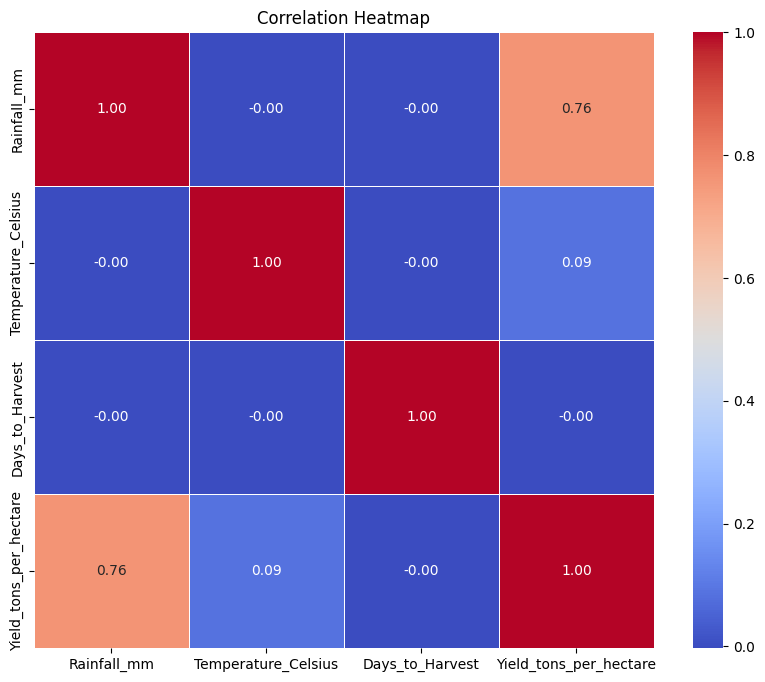

In [12]:
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

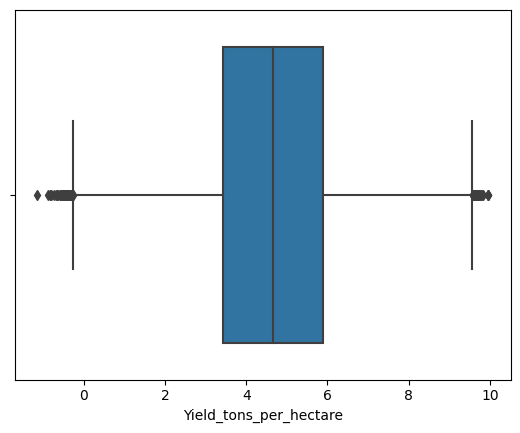

In [13]:
f4=sns.boxplot(x=df['Yield_tons_per_hectare'])

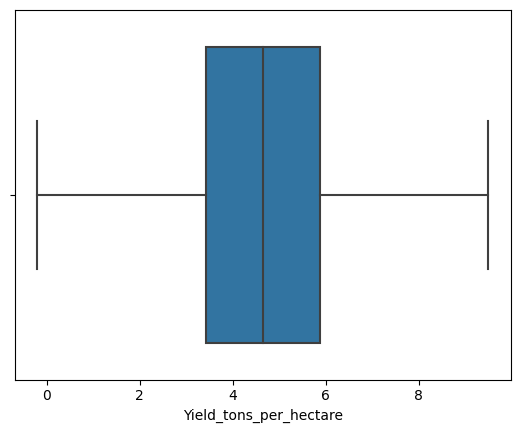

In [14]:
filtered_df = df[(df["Yield_tons_per_hectare"] >= -0.2) & (df["Yield_tons_per_hectare"] <= 9.5)]
Plot = sns.boxplot(x=filtered_df["Yield_tons_per_hectare"])

In [15]:
outliers = [df['Yield_tons_per_hectare'].min(), df['Yield_tons_per_hectare'].max()]

In [16]:
print(*[round(x, 3) for x in outliers])

-1.148 9.963


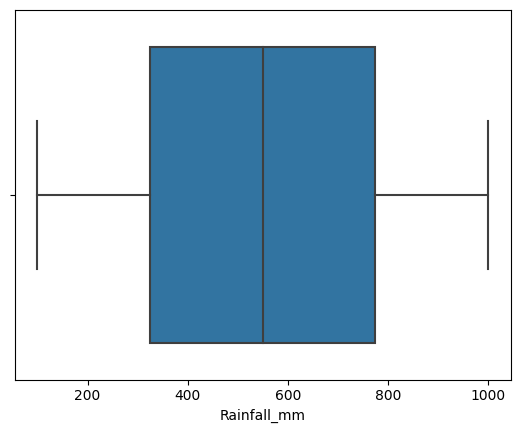

In [17]:
f1=sns.boxplot(x=df['Rainfall_mm'])

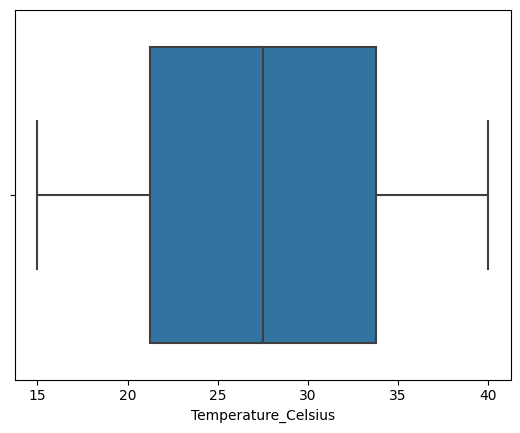

In [18]:
f2=sns.boxplot(x=df['Temperature_Celsius'])

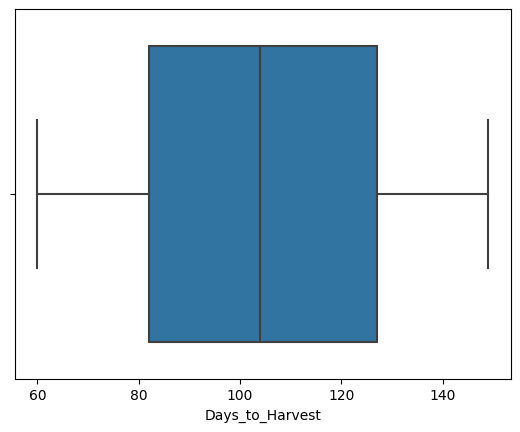

In [19]:
f3=sns.boxplot(x=df['Days_to_Harvest'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


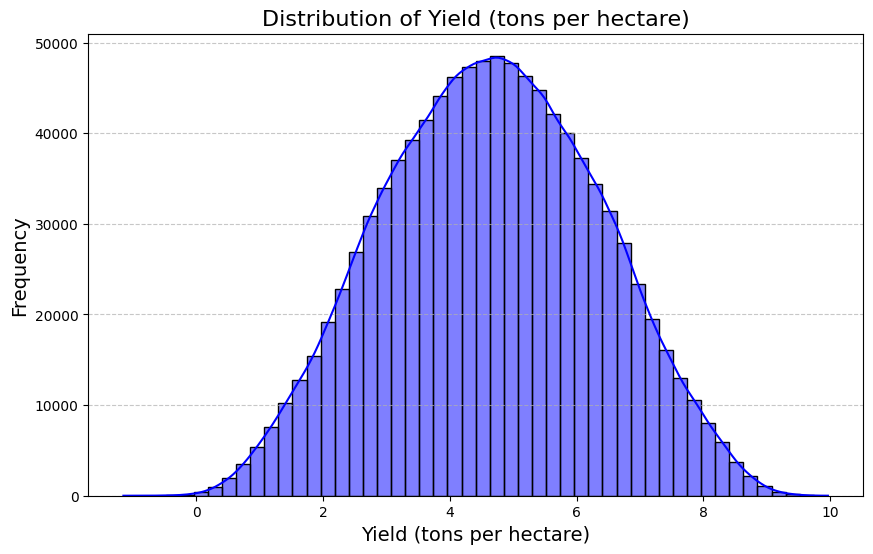

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, bins=50, color='blue')
plt.title('Distribution of Yield (tons per hectare)', fontsize=16)
plt.xlabel('Yield (tons per hectare)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [22]:

# Define bins
bins = [0, 3.415019, 5.868420, 10]
labels = ['Low', 'Medium', 'High']

# Create a new categorical column
df['Yield_Category'] = pd.cut(df['Yield_tons_per_hectare'], bins=bins, labels=labels, include_lowest=True)

df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Yield_Category
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,High
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,High
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Low
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,High
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,High
...,...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586,Low
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594,High
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182,Medium
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159,Low


In [23]:
# Copy the data
data = df.copy()

# Label encode categorical columns
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition', 'Yield_Category']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
feature_cols = data.drop(columns=['Yield_Category','Yield_tons_per_hectare'])
X =  feature_cols # Features
y = data['Yield_Category']         # Target


In [24]:
data

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Yield_Category
0,3,4,1,897.077239,27.676966,False,True,0,122,6.555816,0
1,2,1,3,992.673282,18.026142,True,True,1,140,8.527341,0
2,1,2,0,147.998025,29.794042,False,False,2,106,1.127443,1
3,1,4,4,986.866331,16.644190,False,True,1,146,6.517573,0
4,2,5,5,730.379174,31.620687,True,True,0,110,7.248251,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,5,3,302.805345,27.987428,False,False,2,76,1.347586,1
999996,2,0,0,932.991383,39.661039,True,False,1,93,7.311594,0
999997,1,3,1,867.362046,24.370042,True,False,0,108,5.763182,2
999998,3,5,5,492.812857,33.045505,False,False,2,102,2.070159,1


In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


In [26]:
# Initialize the classifier
clf = DecisionTreeClassifier(max_depth=8, random_state=42)

# Fit the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=42)

In [27]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [28]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.85638
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     50269
           1       0.87      0.84      0.85     49950
           2       0.85      0.87      0.86     99740
           3       0.00      0.00      0.00        41

    accuracy                           0.86    200000
   macro avg       0.64      0.64      0.64    200000
weighted avg       0.86      0.86      0.86    200000



In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best max_depth:", grid_search.best_params_['max_depth'])

Best max_depth: 8


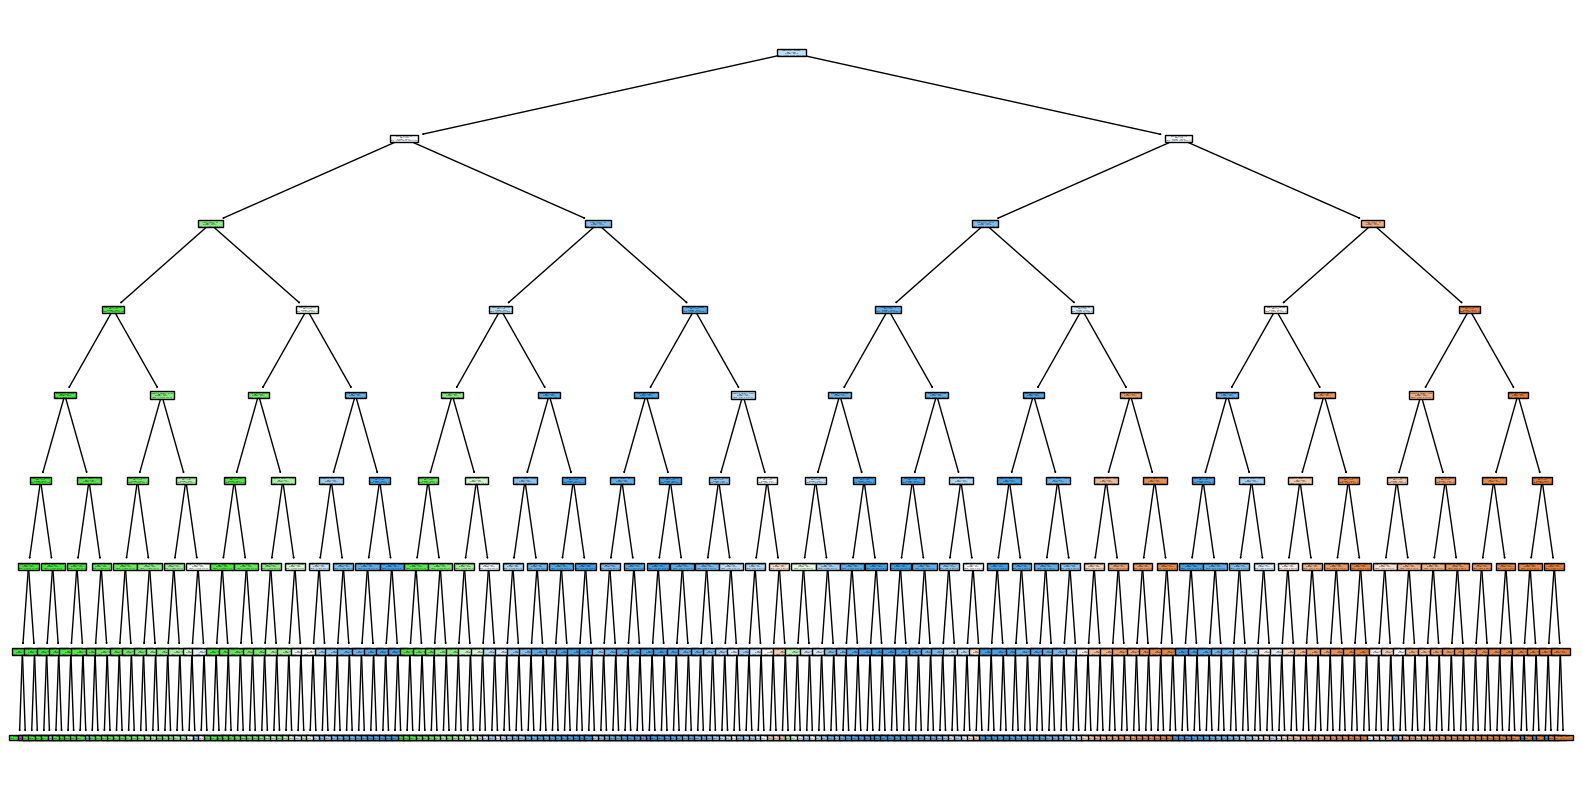

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist())
# Save the figure as a PNG file
plt.savefig("decision_tree.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:

cm = confusion_matrix(y_test, y_pred)
cm_cleaned = cm[:-1, :-1]

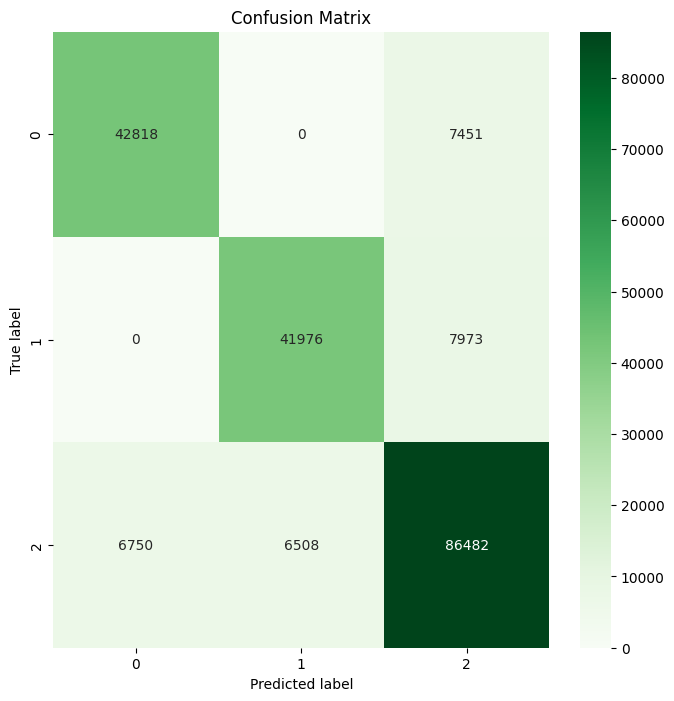

In [32]:
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_cleaned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()